In [16]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import talib


In [11]:
df = pd.read_csv('../../data/yinance/AMZN.csv')
df.head()

,Date,Close,High,Low,Open,Volume
0,2009-01-02,2.718,2.7265,2.5535,2.5675,145928000
1,2009-01-05,2.703,2.7870,2.6515,2.7865,190196000
2,2009-01-06,2.868,2.9110,2.6875,2.7275,221602000
3,2009-01-07,2.810,2.8475,2.7675,2.8145,158854000
4,2009-01-08,2.858,2.8660,2.7290,2.7495,131558000


In [12]:
df.describe()

,Close,High,Low,Open,Volume
count,3774.000000,3774.000000,3774.000000,3774.000000,3.774000e+03
mean,59.408094,60.116390,58.669489,59.423925,9.185184e+07
std,54.918541,55.610783,54.233978,54.953769,6.057553e+07
min,2.422000,2.505000,2.381500,2.428000,1.762600e+07
25%,12.194500,12.300250,12.042125,12.146625,5.586350e+07
50%,36.359499,36.489000,36.004000,36.322500,7.520600e+07
75%,96.638248,97.750000,95.379747,96.663498,1.086060e+08
max,186.570496,188.654007,184.839493,187.199997,1.166116e+09


In [22]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3774 non-null   object 
 1   Close   3774 non-null   float64
 2   High    3774 non-null   float64
 3   Low     3774 non-null   float64
 4   Open    3774 non-null   float64
 5   Volume  3774 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 177.0+ KB


Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

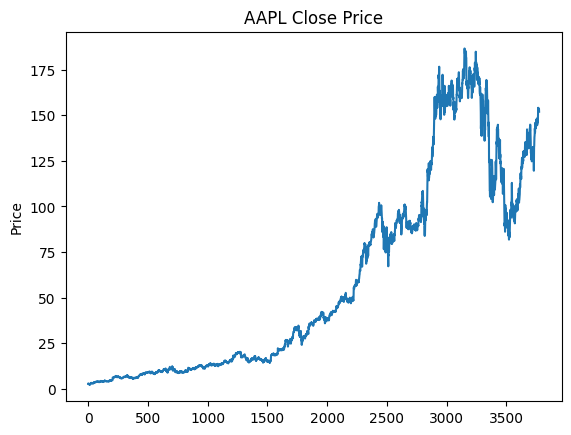

In [ ]:
df['Close'].plot(title="AMZN Close Price")
plt.ylabel("Price")
plt.show()

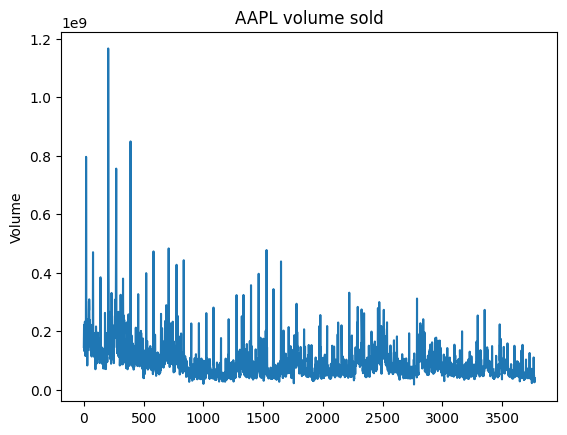

In [ ]:
df['Volume'].plot(title="Amzn volume sold")
plt.ylabel("Volume")
plt.show()

In [26]:
price= df["Close"]
df["SMA_20"] = talib.SMA(price, timeperiod=20)
df["SMA_50"] = talib.SMA(price, timeperiod=50)
df["EMA_20"] = talib.EMA(price, timeperiod=20)

df["RSI_14"] = talib.RSI(price, timeperiod=14)

df["MACD"], df["MACD_signal"], df["MACD_hist"] = talib.MACD(
    price, 
    fastperiod=12, 
    slowperiod=26, 
    signalperiod=9
)

df.tail()

,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
3769,2023-12-22,153.419998,154.350006,152.710007,153.770004,29514100,148.578999,141.2430,148.860492,64.115558,3.135958,2.873052,0.262905
3770,2023-12-26,153.410004,153.979996,153.029999,153.559998,25067200,148.863000,141.7154,149.293779,64.085644,3.118650,2.922172,0.196478
3771,2023-12-27,153.339996,154.779999,153.119995,153.559998,31434700,149.178500,142.1312,149.679133,63.860893,3.063965,2.950530,0.113434
3772,2023-12-28,153.380005,154.080002,152.949997,153.720001,27057000,149.531499,142.5694,150.031597,63.938728,2.989395,2.958303,0.031092
3773,2023-12-29,151.940002,153.889999,151.029999,153.100006,39823200,149.824000,143.0456,150.213350,59.012257,2.782032,2.923049,-0.141017


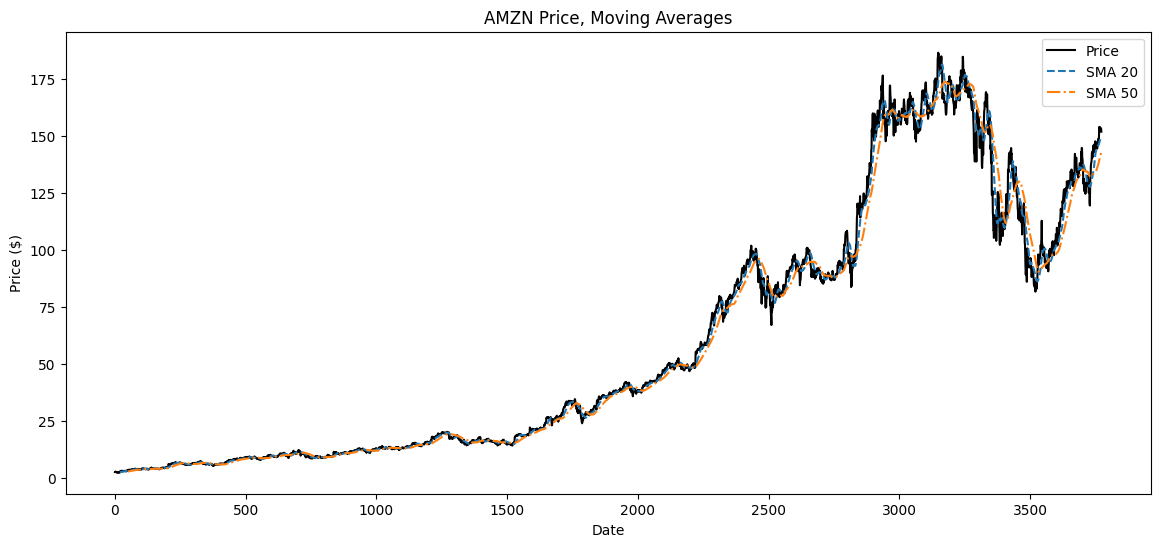

In [27]:

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df.index, price, label="Price", color="black")
ax.plot(df.index, df["SMA_20"], label="SMA 20", linestyle="--")
ax.plot(df.index, df["SMA_50"], label="SMA 50", linestyle="-.")
ax.set_title("AMZN Price, Moving Averages")
ax.set_xlabel("Date")
ax.set_ylabel("Price ($)")
ax.legend()
plt.show()

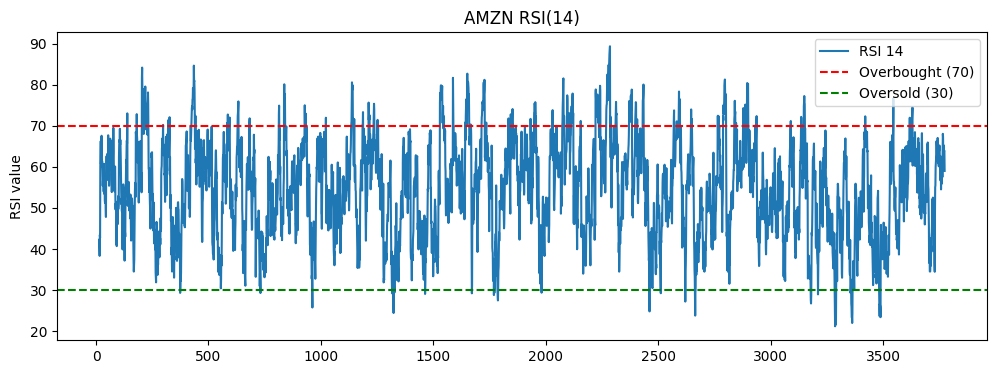

In [29]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df.index, df["RSI_14"], label="RSI 14")
ax.axhline(70, color="red", linestyle="--", label="Overbought (70)")
ax.axhline(30, color="green", linestyle="--", label="Oversold (30)")
ax.set_title("AMZN RSI(14)")
ax.set_ylabel("RSI value")
ax.legend()
plt.show()

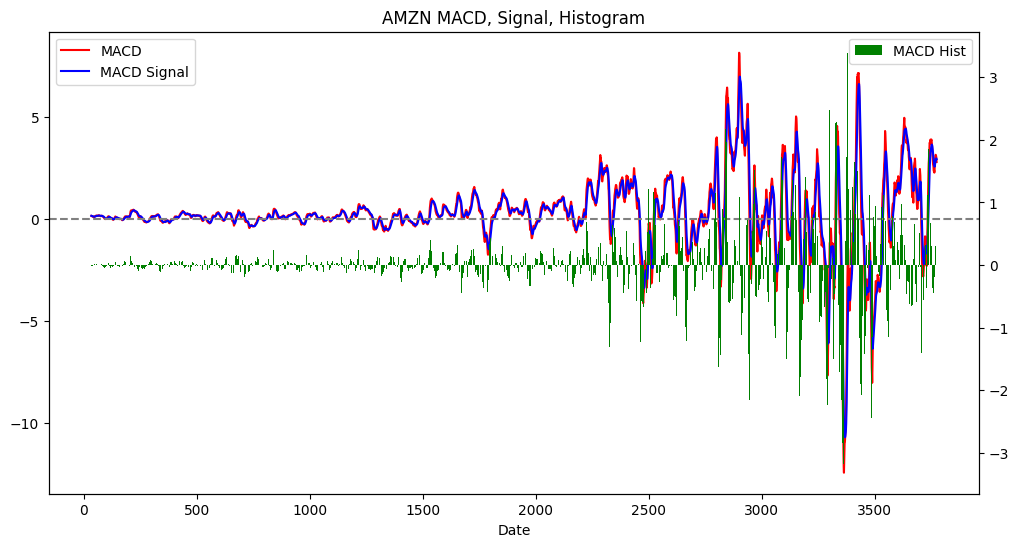

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df.index, df["MACD"], label="MACD", color="red")
ax.plot(df.index, df["MACD_signal"], label="MACD Signal", color="blue")
ax.axhline(0, color="grey", linestyle="--")
ax2 = ax.twinx()
ax2.bar(df.index, df["MACD_hist"], label="MACD Hist", color="green")

ax.set_title("AMZN MACD, Signal, Histogram")
ax.set_xlabel("Date")
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()